## 案例：手指静脉图像增强 (CLAHE)

### 案例概要

几乎所有人都已经熟悉面部识别技术，该技术使用一个人的面部图像识别一个人的身份。同样，指纹识别是一个人扫描其手指，然后计算机分析指纹并识别该人的身份的地方。当前，还有一种当前新兴的技术是 **手指静脉识别** —— 它根据在手指皮肤下散布的静脉模式识别一个人：

![](./img/23.jpg)

### 案例目标

在本案例中，假设您要设计一个识别不同人的手指静脉图像的系统。通过将红外光投射在暗盒中的手指上来获取图像。所获取的手指图像如下所示：

![](./img/24.jfif)

您会看到此图像非常暗，并且看不到任何静脉图案。 因此，设计此识别系统（以及其他任何识别系统）的第一步是执行图像增强。

您的任务是使用以下方法来增强此图像：

- 直方图均衡化
- CLAHE

为上述两个任务中的分别绘制直方图。

**提示：您可以将阈值限制保持为 `4`，区块大小保持为 `16x16`（或您认为合适的任何其他组合）。 执行以下步骤以完成案例：**

### 案例操作详细说明

1. 以灰度模式图像，输出图像。本案例图像存放路径为：`./data/./data/fingervein.bmp`。
2. 查看原图像的直方图。
3. 对图像执行直方图均衡化，输出图像。
4. 查看直方图均衡化后图像的直方图。
5. 对图像执行 CLAHE ，输出图像。
6. 查看  CLAHE 后图像的直方图。

### 案例小结

在本案例中，您看到了直方图均衡化和CLAHE在预处理生物特征数据中的重要性。

从此案例中我们可以看到，在处理图像数据时，直方图均衡化工具在图像预处理阶段有多么强大，而 CLAHE 在使细微细节成为关注焦点方面优于直方图均衡化。


### 案例答案

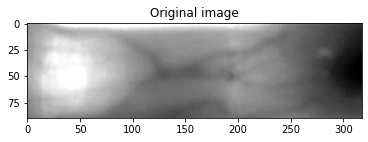

In [1]:
# 导入依赖库
import cv2
import matplotlib.pyplot as plt

# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab3/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 以灰度模式读取图像
img= cv2.imread('./data/fingervein.bmp', 0)

# 输出图像
imgplot = plt.imshow(img , cmap="gray")
plt.title('Original image')
plt.show()

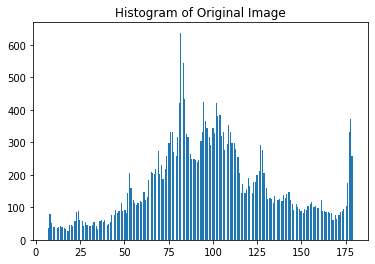

In [2]:
# 绘制直方图
plt.hist(img.ravel(), bins= 256)
plt.title('Histogram of Original Image')
plt.show()

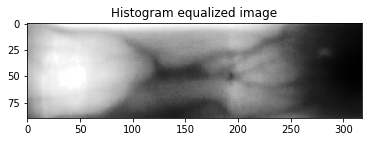

In [3]:
# 执行直方图均衡化
histequ = cv2.equalizeHist(img)

# 输出图像
plt.imshow(histequ , cmap="gray")
plt.title('Histogram equalized image')
plt.show()

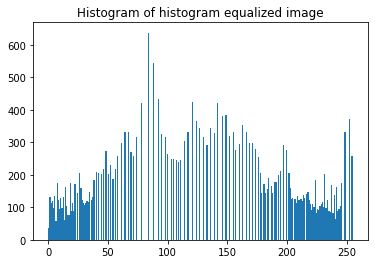

In [4]:
# 绘制直方图
plt.hist(histequ.ravel(), bins= 256)
plt.title('Histogram of histogram equalized image')
plt.show()

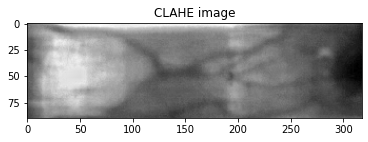

In [5]:
# 执行CLAHE
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))
clahe_img = clahe.apply(img)

# 输出图像
plt.imshow(clahe_img , cmap="gray")
plt.title('CLAHE image')
plt.show()

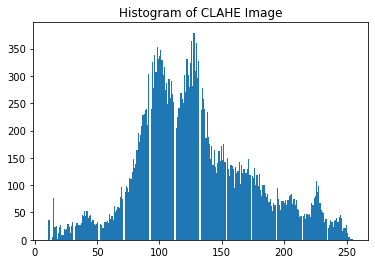

In [6]:
# 绘制直方图
plt.hist(clahe_img.ravel(), bins= 256)
plt.title('Histogram of CLAHE Image')
plt.show()